# Содержание #
<div>
    <ol>
        <li>
            <a href="import_libs">Импорт библиотек</a>
        </li>
        <li>
            <a href="#data">Данные</a>
        </li>
        <li>
            <a href="#prepare">Предобработка данных</a>
        </li>
        <ul>
            <li>
                <a href="#prepare_rename_columns">Переименовние столбцов</a>
            </li>
            <li>
                <a href="#prepare_nan_found">Поиск пропущенных значений</a>
            </li>
            <li>
                <a href="#data_cor">Корреляция данных</a>
            </li>
            <li>
                <a href="#ohe">OHE-преобразование</a>
            </li>
            <li>
                <a href="#cor_after_ohe">Корреляция данных полученных после OHE-преобразования</a>
            </li>
            <li>
                <a href="#split_data">Разбиение данных на выборки</a>
            </li>
            <li>
                <a href="#param_stadarts">Стандартизация признаков</a>
            </li>
            <li>
                <a href="#get_study_data">Выделение обучающего набора</a>
            </li>
            <li>
                <a href="#get_valid_test_data">Выделение тестового/валидационного набора</a>
            </li>
        </ul>
        <li>
            <a href="#research">Исследование задачи</a>
        </li>
        <ul>
            <li>
                <a href="#research_balance">Оценка баланса классов</a>
            </li>
            <li>
                <a href="#log_regress_get_params">Подбор гиперпараметров LogisticRegression</a>
            </li>
            <li>
                <a href="#create_log_regress_model">Создание модели LogisticRegression</a>
            </li>
            <li>
                <a href="#decision_tree_get_params">Подбор гиперпараметров DecisionTreeClassifier</a>
            </li>
            <li>
                <a href="#create_decision_tree_model">Создание модели DecisionTreeClassifier</a>
            </li>
            <li>
                <a href="#random_forest_get_params">Подбор гиперпараметров RandomForestClassifier</a>
            </li>
            <li>
                <a href="#create_random_forest_model">Создание модели RandomForestClassifier</a>
            </li>
            <li>
                <a href="#metrics_log_regress">Метрики LogisticRegression</a>
            </li>
            <li>
                <a href="#metrics_decision_tree">Метрики DecisionTreeClassifier</a>
            </li>
            <li>
                <a href="#metrics_random_forest">Метрики RandomForestClassifier</a>
            </li>
        </ul>
        <li>
            <a href="#disbalance_holy_war">Борьба с дисбалансом</a>
        </li>
        <ul>
            <li>
                <a href="#set_class_weight">Параметр class_weight='balanced'</a>
            </li>
            <ul>
                <li>
                    <a href="#metrics_class_weight_log_regression">Метрики для LogisticRegression</a>
                </li>
                <li>
                    <a href="#metrics_class_weight_decision_tree">Метрики DecisionTreeClassifier</a>
                </li>
                <li>
                    <a href="#metrics_class_weight_random_forest">Метрики RandomForestClassifier</a>
                </li>
            </ul>
            <li>
                <a href="#upsampling">Увеличение выборки</a>
            </li>
            <ul>
                <li>
                    <a href="#def_upsampling">Функция увеличения выборки</a>
                </li>
                <li>
                    <a href="#upsampling_metrics_log_regression">Метрики LogisticRegression</a>
                </li>
                <li>
                    <a href="#upsampling_metrics_decision_tree">Метрики DecisionTreeClassifier</a>
                </li>
                <li>
                    <a href="#upsampling_metrics_random_forest">Метрики RandomForestClassifier</a>
                </li>
            </ul>
            <li>
                <a href="#downsampling">Уменьшение выборки</a>
            </li>
            <ul>
                <li>
                    <a href="#def_downsampling">Функция уменьшения выборки</a>
                </li>
                <li>
                    <a href="#downsampling_metrics_log_regress">Метрики LogisticRegression</a>
                </li>
                <li>
                    <a href="#downsampling_metrics_decision_tree">Метрики DecisionTreeClassifier</a>
                </li>
                <li>
                    <a href="#downsampling_metrics_random_forest">Метрики RandomForestClassifier</a>
                </li>
            </ul>
        </ul>
        <li>
            <a href="#summary">Вывод</a>
        </li>
    </ol>
</div>

<a id='import_libs'></a>
# Импорт библиотек #

In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

<a id='data'></a>
# Данные #

In [2]:
data = pd.read_csv('datasets/Churn.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


<a id='prepare'></a>
# Предобработка данных #

<a id='prepare_rename_columns'></a>
## Переименовние столбцов ##

In [3]:
data = data.drop(columns='RowNumber')

data = data.rename({'CustomerId':'customer_id',
                    'CreditScore':'credit_score',
                    'NumOfProducts':'num_of_products',
                    'HasCrCard':'has_cr_card',
                    'IsActiveMember':'is_active_member',
                    'EstimatedSalary':'estimated_salary'}, axis=1)

data.columns = data.columns.str.lower()

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   surname           10000 non-null  object 
 2   credit_score      10000 non-null  int64  
 3   geography         10000 non-null  object 
 4   gender            10000 non-null  object 
 5   age               10000 non-null  int64  
 6   tenure            9091 non-null   float64
 7   balance           10000 non-null  float64
 8   num_of_products   10000 non-null  int64  
 9   has_cr_card       10000 non-null  int64  
 10  is_active_member  10000 non-null  int64  
 11  estimated_salary  10000 non-null  float64
 12  exited            10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB
None


<a id='prepare_nan_found'></a>
## Поиск пропущенных значений ##

In [4]:
print(data.isna().sum())
data.tenure = data['tenure'].fillna(0).astype('int')
print(data.info())

customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   surname           10000 non-null  object 
 2   credit_score      10000 non-null  int64  
 3   geography         10000 non-null  object 
 4   gender            10000 non-null  object 
 5   age               10000 non-null  int64  
 6   tenure            10000 non-null  int32  
 7   balance           10000 non-null  float64
 8   num_of_products   10000 non-null  int64  
 9   has_cr_card       10000 non-null  int64  
 10

<a id='data_cor'></a>

## Корреляция данных ##

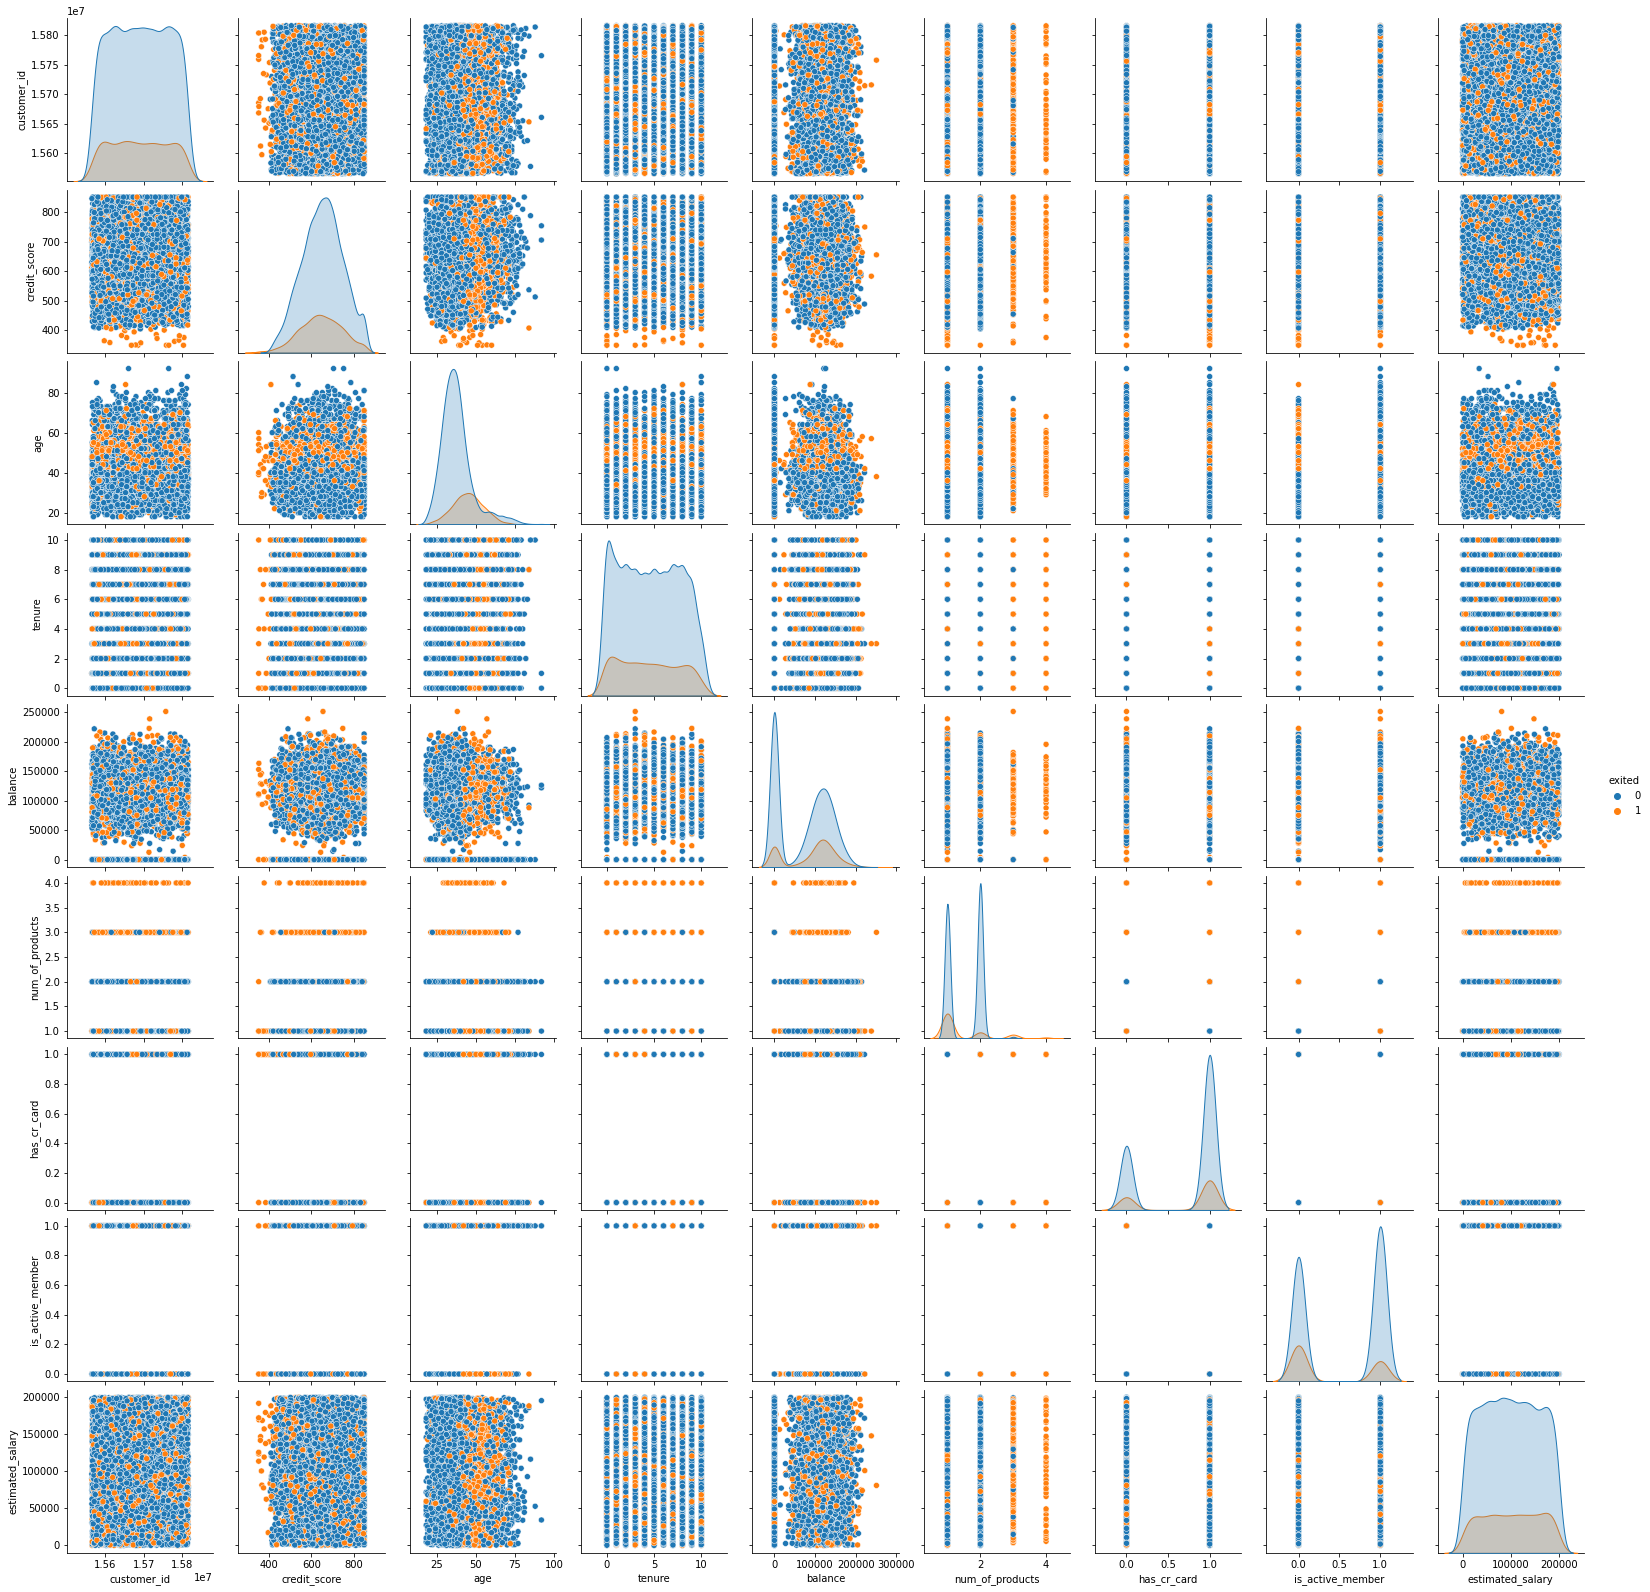

In [5]:
sns.pairplot(data=data, hue='exited')

## Вывод ##
Максимальный отток среди клиентов:
    * со средним кредитным рейтингом
    * в возрасте 32-36 лет
    * срок использования услуг банка ~2 года
    * сумма на счетах 25 тыс. рублей, 40 тыс. рублей
    * использующих 1 банковский продукт
    * неактивные пользователи
    * являющиеся держателями кредитной карты
    * с предполагаемым доходом ~50 тыс. руб.

Столбцы важные для дальнейшего обучения:
    * data.estimated_salary
    * data.is_active_member
    * data.has_cr_card
    * data.num_of_products
    * data.balance
    * data.tenure
    * data.age
    * data.credit_score

Следует учесть что остались следующие категориальные значения:
    * data.surname   - на основе представленных данных вероятнее всего не влияет на отток
    * data.geography - необходимо OHE-преобразование
    * data.gender    - необходимо OHE-преобразование

Т.к. большинство признаков количественные, будет использована техника OHE.

<a id='ohe'></a>
## OHE-преобразование ##

In [6]:
data = pd.get_dummies(data=data, columns=['geography', 'gender'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        10000 non-null  int64  
 1   surname            10000 non-null  object 
 2   credit_score       10000 non-null  int64  
 3   age                10000 non-null  int64  
 4   tenure             10000 non-null  int32  
 5   balance            10000 non-null  float64
 6   num_of_products    10000 non-null  int64  
 7   has_cr_card        10000 non-null  int64  
 8   is_active_member   10000 non-null  int64  
 9   estimated_salary   10000 non-null  float64
 10  exited             10000 non-null  int64  
 11  geography_France   10000 non-null  uint8  
 12  geography_Germany  10000 non-null  uint8  
 13  geography_Spain    10000 non-null  uint8  
 14  gender_Female      10000 non-null  uint8  
 15  gender_Male        10000 non-null  uint8  
dtypes: float64(2), int32(1)

In [7]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        10000 non-null  int64  
 1   surname            10000 non-null  object 
 2   credit_score       10000 non-null  int64  
 3   age                10000 non-null  int64  
 4   tenure             10000 non-null  int32  
 5   balance            10000 non-null  float64
 6   num_of_products    10000 non-null  int64  
 7   has_cr_card        10000 non-null  int64  
 8   is_active_member   10000 non-null  int64  
 9   estimated_salary   10000 non-null  float64
 10  exited             10000 non-null  int64  
 11  geography_france   10000 non-null  uint8  
 12  geography_germany  10000 non-null  uint8  
 13  geography_spain    10000 non-null  uint8  
 14  gender_female      10000 non-null  uint8  
 15  gender_male        10000 non-null  uint8  
dtypes: float64(2), int32(1)

<a id='cor_after_ohe'></a>
## Корреляция данных полученных после OHE-преобразования ##

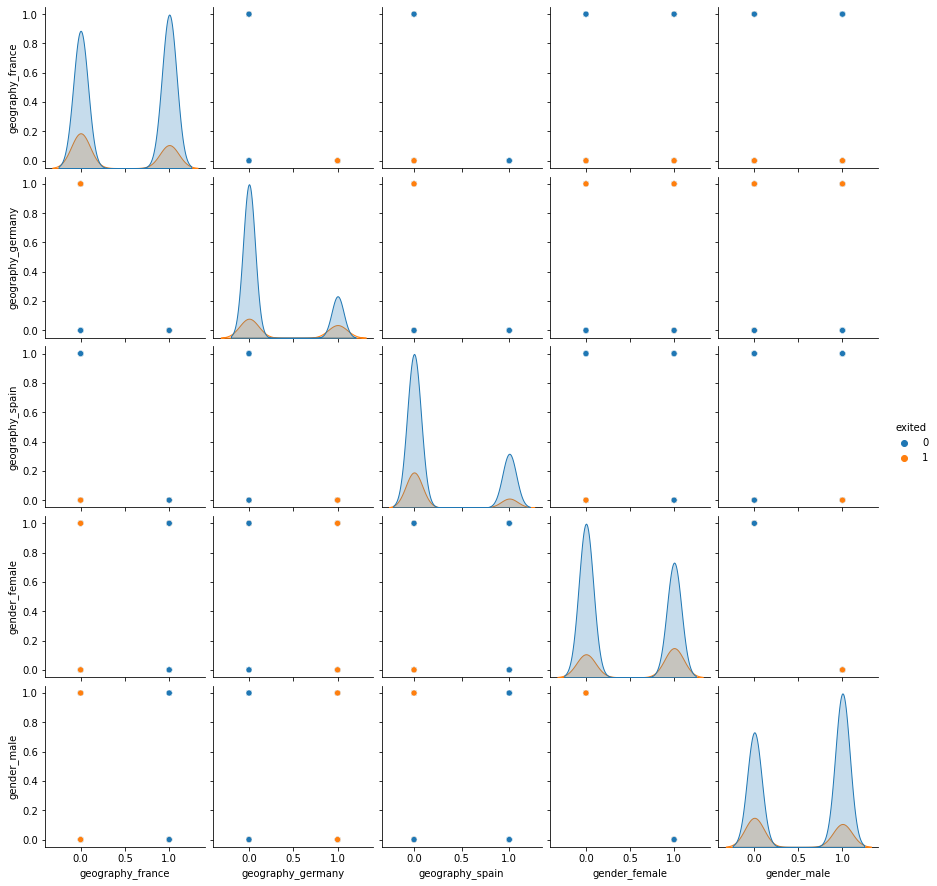

In [8]:
sns.pairplot(data=data, hue='exited', vars=['geography_france', 'geography_germany', 'geography_spain',
                                           'gender_female', 'gender_male'])

In [9]:
data = data.drop(columns=['customer_id', 'surname'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  int32  
 3   balance            10000 non-null  float64
 4   num_of_products    10000 non-null  int64  
 5   has_cr_card        10000 non-null  int64  
 6   is_active_member   10000 non-null  int64  
 7   estimated_salary   10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_france   10000 non-null  uint8  
 10  geography_germany  10000 non-null  uint8  
 11  geography_spain    10000 non-null  uint8  
 12  gender_female      10000 non-null  uint8  
 13  gender_male        10000 non-null  uint8  
dtypes: float64(2), int32(1), int64(6), uint8(5)
memory usage: 713.0 KB


## Вывод ##
Итоговый список столбцов необходимый для дальнейшей работы:
    * data.estimated_salary
    * data.is_active_member
    * data.has_cr_card
    * data.num_of_products
    * data.balance
    * data.tenure
    * data.age
    * data.credit_score
    * data.geography_france
    * data.geography_germany
    * data.geography_spain
    * data.gender_female
    * data.gender_male

<a id='split_data'></a>
## Разбиение данных на выборки ##

In [10]:
target = data.exited
print(f'Target: {target.shape}')
features = data.drop(columns='exited')
print(f'Features: {features.shape}')

Target: (10000,)
Features: (10000, 13)


<a id='param_stadarts'></a>
## Стандартизация признаков ##

In [11]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features[numeric])
features[numeric] = scaler.transform(data[numeric])
features

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_france,geography_germany,geography_spain,gender_female,gender_male
0,-0.326221,0.293517,-0.817441,-1.225848,-0.911583,1,1,0.021886,1,0,0,1,0
1,-0.440036,0.198164,-1.138838,0.117350,-0.911583,0,1,0.216534,0,0,1,1,0
2,-1.536794,0.293517,1.110941,1.333053,2.527057,1,0,0.240687,1,0,0,1,0
3,0.501521,0.007457,-1.138838,-1.225848,0.807737,0,0,-0.108918,1,0,0,1,0
4,2.063884,0.388871,-0.817441,0.785728,-0.911583,1,1,-0.365276,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,0.146750,-1.225848,0.807737,1,0,-0.066419,1,0,0,0,1
9996,-1.391939,-0.373958,1.753735,-0.306379,-0.911583,1,1,0.027988,1,0,0,0,1
9997,0.604988,-0.278604,0.789544,-1.225848,-0.911583,0,1,-1.008643,1,0,0,1,0
9998,1.256835,0.293517,-0.496044,-0.022608,0.807737,1,0,-0.125231,0,1,0,0,1


<a id='get_study_data'></a>
## Выделение обучающего набора ##

In [12]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            train_size=0.6,
                                                                            random_state=2020,
                                                                            stratify=target)
print(f'Train features: {features_train.shape}')
print(f'Features test: {features_test.shape}')
print(f'Target train: {target_train.shape}')
print(f'Target test: {target_test.shape}')

Train features: (6000, 13)
Features test: (4000, 13)
Target train: (6000,)
Target test: (4000,)


<a id='get_valid_test_data'></a>
## Выделение тестового/валидационного набора ##

In [13]:
features_test, features_valid, target_test, target_valid = train_test_split(features_test,
                                                                            target_test,
                                                                            test_size=0.5,
                                                                            random_state=2020,
                                                                            stratify=target_test)

print(f'Test features: {features_test.shape}')
print(f'Valid features: {features_valid.shape}')
print(f'Test target: {target_test.shape}')
print(f'Valid target: {target_valid.shape}')

Test features: (2000, 13)
Valid features: (2000, 13)
Test target: (2000,)
Valid target: (2000,)


<a id='research'></a>
# Исследование задачи #

<a id='research_balance'></a>
## Оценка баланса классов ##

<AxesSubplot:xlabel='exited', ylabel='Count'>

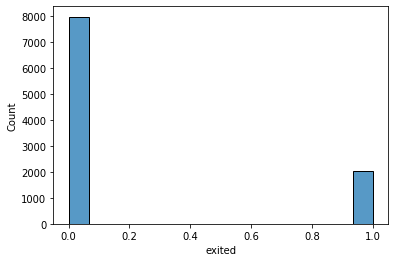

In [14]:
sns.histplot(target)

<a id='log_regress_get_params'></a>
## Подбор гиперпараметров LogisticRegression ##

In [15]:
%time
clf = LogisticRegression()

parameters = {'penalty':['l1','l2'],
              'C':np.arange(0.01,1.0,0.1),
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'random_state':[2020]}

grid = GridSearchCV(clf, parameters, scoring='f1', verbose=10, n_jobs=-1)
grid.fit(features_train, target_train)
best_params_log_regress = grid.best_params_
print(f'Лучшие параметры: {best_params_log_regress}')

Wall time: 0 ns
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Лучшие параметры: {'C': 0.81, 'penalty': 'l2', 'random_state': 2020, 'solver': 'liblinear'}


<a id='create_log_regress_model'></a>
## Создание модели LogisticRegression ##

In [16]:
logistic_model = LogisticRegression(penalty=best_params_log_regress.get('penalty'),
                                    C=best_params_log_regress.get('C'),
                                    solver=best_params_log_regress.get('solver'),
                                    random_state=best_params_log_regress.get('random_state'))

<a id='decision_tree_get_params'></a>
## Подбор гиперпараметров DecisionTreeClassifier ##

In [17]:
%time
clf = DecisionTreeClassifier()

parameters = {'max_depth':range(1,200,1),
              'criterion':['gini','entropy'],
              'random_state':[2020]}

grid = GridSearchCV(clf, parameters, scoring='f1', verbose=10, n_jobs=-1)
grid.fit(features_train, target_train)
best_params_dec_tree = grid.best_params_
print(f'Лучшие параметры: {best_params_dec_tree}')

Wall time: 0 ns
Fitting 5 folds for each of 398 candidates, totalling 1990 fits
Лучшие параметры: {'criterion': 'entropy', 'max_depth': 8, 'random_state': 2020}


<a id='create_decision_tree_model'></a>
## Создание модели DecisionTreeClassifier ##

In [18]:
tree_model = DecisionTreeClassifier(criterion=best_params_dec_tree.get('criterion'),
                                    max_depth=best_params_dec_tree.get('max_depth'),
                                    random_state=best_params_dec_tree.get('random_state'))

<a id='random_forest_get_params'></a>
## Подбор гиперпараметров для RandomForestClassifier ##

In [19]:
%time
clf = RandomForestClassifier()

parameters = {'n_estimators':range(1,51,5),
              'max_depth':range(1,51,1),
              'criterion':['gini','entropy'],
              'min_samples_leaf':range(1,21,1),
              'min_samples_split':range(2,21,2),
              'random_state':[2020]}

grid = GridSearchCV(clf, parameters, scoring='f1', verbose=10, n_jobs=-1)
grid.fit(features_train, target_train)
best_params_rand_forest = grid.best_params_
print(f'Лучшие параметры: {best_params_rand_forest}')

Wall time: 0 ns
Fitting 5 folds for each of 200000 candidates, totalling 1000000 fits
Лучшие параметры: {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 36, 'random_state': 2020}


<a id='create_random_forest_model'></a>
## Создание модели RandomForestClassifier ##

In [20]:
forest_model = RandomForestClassifier(n_estimators=best_params_rand_forest.get('n_estimators'),
                                      max_depth=best_params_rand_forest.get('max_depth'),
                                      criterion=best_params_rand_forest.get('criterion'),
                                      min_samples_leaf=best_params_rand_forest.get('min_samples_leaf'),
                                      min_samples_split=best_params_rand_forest.get('min_samples_split'),
                                      random_state=best_params_rand_forest.get('random_state'))

<a id='metrics_log_regress'></a>
## Метрики LogisticRegression ##

In [21]:
%%time

logistic_model.fit(features_train, target_train)

Wall time: 8.98 ms


LogisticRegression(C=0.81, random_state=2020, solver='liblinear')

In [22]:
predicted_valid = logistic_model.predict(features_valid)
print(f'Метрика F1 логистической регрессии: {f1_score(target_valid, predicted_valid)}')

Метрика F1 логистической регрессии: 0.3272058823529412


In [23]:
probabilities_valid = logistic_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(f'Метрика AUC_ROC логистической регрессии: {roc_auc_score(target_valid, probabilities_one_valid)}')

Метрика AUC_ROC логистической регрессии: 0.7731568240042817


<a id='metrics_decision_tree'></a>
## Метрики DecisionTreeClassifier ##

In [24]:
%%time

tree_model.fit(features_train, target_train)

Wall time: 21.9 ms


DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2020)

In [25]:
predicted_valid = tree_model.predict(features_valid)
print(f'Метрика F1 дерева решений: {f1_score(target_valid, predicted_valid)}')

Метрика F1 дерева решений: 0.5608011444921317


In [26]:
probabilities_valid = tree_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(f'Метрика AUC_ROC дерева решений: {roc_auc_score(target_valid, probabilities_one_valid)}')

Метрика AUC_ROC дерева решений: 0.8024395736260144


<a id='metrics_random_forest'></a>
## Метрики RandomForestClassifier ##

In [27]:
%%time

forest_model.fit(features_train, target_train)

Wall time: 198 ms


RandomForestClassifier(max_depth=17, min_samples_split=6, n_estimators=36,
                       random_state=2020)

In [28]:
predicted_valid = forest_model.predict(features_valid)
print(f'Метрика F1 случайного леса: {f1_score(target_valid, predicted_valid)}')

Метрика F1 случайного леса: 0.5935672514619883


In [29]:
probabilities_valid = forest_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(f'Метрика AUC_ROC дерева решений: {roc_auc_score(target_valid, probabilities_one_valid)}')

Метрика AUC_ROC дерева решений: 0.8399231280587213


# Вывод #
Несмотря на высокие значения AUC_ROC для представленных моделей, возможно связанных с проведенной заранее нормализацией
данных, не удалось достичь значения F1=0.59.
Полученные значения F1 и график распределения классов указывают на наличие дисбаланса классов.

<a id='disbalance_holy_war'></a>
# Борьба с дисбалансом #

<a id='set_class_weight'></a>
## Параметр class_weight='balanced' ##

<a id='metrics_class_weight_log_regression'></a>
### Метрики для LogisticRegression ###

In [30]:
%%time

model = LogisticRegression(penalty=best_params_log_regress.get('penalty'),
                           C=best_params_log_regress.get('C'),
                           random_state=best_params_log_regress.get('random_state'),
                           solver=best_params_log_regress.get('solver'),
                           class_weight='balanced')
model.fit(features_train, target_train)

Wall time: 12 ms


LogisticRegression(C=0.81, class_weight='balanced', random_state=2020,
                   solver='liblinear')

In [31]:
predicted_valid = model.predict(features_valid)
print(f'Метрика F1 логистической регрессии: {f1_score(target_valid, predicted_valid)}')

Метрика F1 логистической регрессии: 0.5029838022165388


In [32]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(f'Метрика AUC_ROC логистической регрессии: {roc_auc_score(target_valid, probabilities_one_valid)}')

Метрика AUC_ROC логистической регрессии: 0.7771669975059804


<a id='metrics_class_weight_decision_tree'></a>
### Метрики DecisionTreeClassifier ###

In [33]:
%%time
model = DecisionTreeClassifier(criterion=best_params_dec_tree.get('criterion'),
                               max_depth=best_params_dec_tree.get('max_depth'),
                               random_state=best_params_dec_tree.get('random_state'),
                               class_weight='balanced')
model.fit(features_train, target_train)

Wall time: 25.9 ms


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, random_state=2020)

In [34]:
predicted_valid = model.predict(features_valid)
print(f'Метрика F1 дерева решений: {f1_score(target_valid, predicted_valid)}')

Метрика F1 дерева решений: 0.5315555555555556


In [35]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(f'Метрика AUC_ROC дерева решений: {roc_auc_score(target_valid, probabilities_one_valid)}')

Метрика AUC_ROC дерева решений: 0.8068546204139424


<a id='metrics_class_weight_random_forest'></a>
### Метрики RandomForestClassifier ###

In [36]:
%%time
model = RandomForestClassifier(n_estimators=best_params_rand_forest.get('n_estimators'),
                               max_depth=best_params_rand_forest.get('max_depth'),
                               criterion=best_params_rand_forest.get('criterion'),
                               min_samples_leaf=best_params_rand_forest.get('min_samples_leaf'),
                               min_samples_split=best_params_rand_forest.get('min_samples_split'),
                               random_state=best_params_rand_forest.get('random_state'),
                               class_weight='balanced')
model.fit(features_train, target_train)

Wall time: 182 ms


RandomForestClassifier(class_weight='balanced', max_depth=17,
                       min_samples_split=6, n_estimators=36, random_state=2020)

In [37]:
predicted_valid = model.predict(features_valid)
print(f'Метрика F1 случайного леса: {f1_score(target_valid, predicted_valid)}')

Метрика F1 случайного леса: 0.6021220159151194


In [38]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(f'Метрика AUC_ROC дерева решений: {roc_auc_score(target_valid, probabilities_one_valid)}')

Метрика AUC_ROC дерева решений: 0.8438214794146998


<a id='upsampling'></a>
## Увеличение выборки ##

<a id='def_upsampling'></a>
### Функция увеличения выборки ###

In [39]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=2020)

    return features_upsampled, target_upsampled

<AxesSubplot:xlabel='exited', ylabel='Count'>

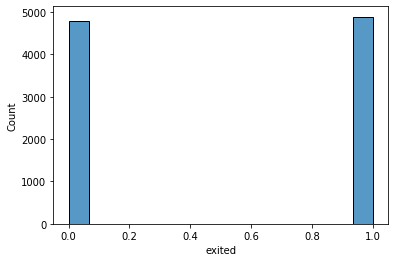

In [40]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
sns.histplot(target_upsampled)

<a id='upsampling_metrics_log_regression'></a>
### Метрики LogisticRegression ###

In [41]:
%%time

logistic_model.fit(features_upsampled, target_upsampled)

Wall time: 14 ms


LogisticRegression(C=0.81, random_state=2020, solver='liblinear')

In [42]:
predicted_valid = logistic_model.predict(features_valid)
print(f'Метрика F1 логистической регрессии: {f1_score(target_valid, predicted_valid)}')

Метрика F1 логистической регрессии: 0.5042016806722689


In [43]:
probabilities_valid = logistic_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(f'Метрика AUC_ROC логистической регрессии: {roc_auc_score(target_valid, probabilities_one_valid)}')

Метрика AUC_ROC логистической регрессии: 0.7771731670036756


<a id='upsampling_metrics_decision_tree'></a>
### Метрики DecisionTreeClassifier ###

In [44]:
%%time

tree_model.fit(features_upsampled, target_upsampled)

Wall time: 28.9 ms


DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2020)

In [45]:
predicted_valid = tree_model.predict(features_valid)
print(f'Метрика F1 дерева решений: {f1_score(target_valid, predicted_valid)}')

Метрика F1 дерева решений: 0.5315555555555556


In [46]:
probabilities_valid = tree_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(f'Метрика AUC_ROC дерева решений: {roc_auc_score(target_valid, probabilities_one_valid)}')

Метрика AUC_ROC дерева решений: 0.8066587388621287


<a id='upsampling_metrics_random_forest'></a>
### Метрики RandomForestClassifier ###

In [47]:
%%time

forest_model.fit(features_upsampled, target_upsampled)

Wall time: 271 ms


RandomForestClassifier(max_depth=17, min_samples_split=6, n_estimators=36,
                       random_state=2020)

In [48]:
predicted_valid = forest_model.predict(features_valid)
print(f'Метрика F1 случайного леса: {f1_score(target_valid, predicted_valid)}')

Метрика F1 случайного леса: 0.6053921568627451


In [49]:
probabilities_valid = forest_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(f'Метрика AUC_ROC дерева решений: {roc_auc_score(target_valid, probabilities_one_valid)}')

Метрика AUC_ROC дерева решений: 0.8418025112940368


<a id='downsampling'></a>
## Уменьшение выборки ##

<a id='def_downsampling'></a>
### Функция уменьшения выборки ###

In [50]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=2020)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=2020)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=2020)

    return features_downsampled, target_downsampled

<AxesSubplot:xlabel='exited', ylabel='Count'>

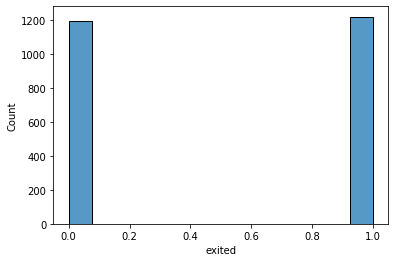

In [51]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
sns.histplot(target_downsampled)


<a id='downsampling_metrics_log_regress'></a>
### Метрики LogisticRegression ###

In [52]:
%%time

logistic_model.fit(features_downsampled, target_downsampled)

Wall time: 6.98 ms


LogisticRegression(C=0.81, random_state=2020, solver='liblinear')

In [53]:
predicted_valid = logistic_model.predict(features_valid)
print(f'Метрика F1 логистической регрессии: {f1_score(target_valid, predicted_valid)}')

Метрика F1 логистической регрессии: 0.4999999999999999


In [54]:
probabilities_valid = logistic_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(f'Метрика AUC_ROC логистической регрессии: {roc_auc_score(target_valid, probabilities_one_valid)}')

Метрика AUC_ROC логистической регрессии: 0.775214351485538


<a id='downsampling_metrics_decision_tree'></a>
### Метрики DecisionTreeClassifier ###

In [55]:
%%time

tree_model.fit(features_downsampled, target_downsampled)

Wall time: 9.97 ms


DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2020)

In [56]:
predicted_valid = tree_model.predict(features_valid)
print(f'Метрика F1 дерева решений: {f1_score(target_valid, predicted_valid)}')

Метрика F1 дерева решений: 0.5448215839860748


In [57]:
probabilities_valid = tree_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(f'Метрика AUC_ROC дерева решений: {roc_auc_score(target_valid, probabilities_one_valid)}')

Метрика AUC_ROC дерева решений: 0.8070019171714087


<a id='downsampling_metrics_random_forest'></a>
### Метрики RandomForestClassifier ###

In [58]:
%%time

forest_model.fit(features_downsampled, target_downsampled)

Wall time: 87.8 ms


RandomForestClassifier(max_depth=17, min_samples_split=6, n_estimators=36,
                       random_state=2020)

In [59]:
predicted_valid = forest_model.predict(features_valid)
print(f'Метрика F1 случайного леса: {f1_score(target_valid, predicted_valid)}')

Метрика F1 случайного леса: 0.5581818181818181


In [60]:
probabilities_valid = forest_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(f'Метрика AUC_ROC дерева решений: {roc_auc_score(target_valid, probabilities_one_valid)}')

Метрика AUC_ROC дерева решений: 0.8417045705181297


<a id='summary'></a>
# Вывод #
Применены следующие техники балансировки классов:
    - параметр class_weight='balanced'
        * удалось достичь значения F1>=0.59 для модели "случайный лес"
        * высокую чувствительность к данному виду балансировки показала только модель "логистическая регрессия"
    - увеличение выборки(upsampling):
        * удалось достичь значения F1>=0.59 для модели "случайный лес"
        * значение метрики F1 выросло для всех представленных моделей
    - уменьшение выборки(downsampling):
        * не удалось достичь значения F1>=0.59
        * значение F1 упало для всех представленных моделей
        * для небольших наборов данных использование данной техники нецелесообразно
    - значение метрики AUC_ROC оставлось высоким для всех представленных моделей

<a id='model_test'></a>

# Тестирование модели #

<a id='data_union'></a>
## Объединения учебной и валидационной выборок ##

(8000, 13)
(8000,)


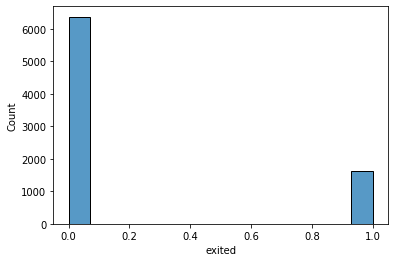

In [61]:
features_test_fit = features_train.append(features_valid)
target_test_fit = target_train.append(target_valid)

sns.histplot(target_test_fit)

print(features_test_fit.shape)
print(target_test_fit.shape)

<a id='dummy_test'></a>
## Проверка константной модели ##

In [62]:
model = DummyClassifier(random_state=2020)
model.fit(features_test_fit, target_test_fit)

predicted_valid = model.predict(features_test)
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
print(f'Метрика F1 константной модели: {f1_score(target_test, predicted_valid)}')
print(f'Метрика AUC_ROC константной модели: {roc_auc_score(target_test, probabilities_one_valid)}')

Метрика F1 константной модели: 0.0
Метрика AUC_ROC константной модели: 0.5


<a id='best_model_test'></a>
## Тетирование лучшей модели ##

In [63]:
features_upsampled, target_upsampled = upsample(features_test_fit, target_test_fit, 4)
forest_model.fit(features_upsampled, target_upsampled)

predicted_valid = forest_model.predict(features_test)
probabilities_valid = forest_model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
print(f'Метрика F1 лучшей модели: {f1_score(target_test, predicted_valid)}')
print(f'Метрика AUC_ROC лучшей модели: {roc_auc_score(target_test, probabilities_one_valid)}')

Метрика F1 лучшей модели: 0.6019900497512437
Метрика AUC_ROC лучшей модели: 0.8410195893684106


# Вывод #
Построена модель на основе алгоритма "RandomForest", для которой достигнуто значение меры F1>=0.59.
При подборе параметров модели использовался механизм подбор параметров по сетке.